In [1]:
import numpy as np
import numpy.fft as fft
from matplotlib import pyplot as plt
import h5py
from matplotlib import mlab
import seaborn as sns
from scipy import ndimage as ni
from scipy import signal
from ulmo.plotting import plotting as ulmo_plotting
from ulmo.analysis import numpy_ffft
from ulmo.analysis import mlab_ffft
import time

#### Grab a cutout

In [2]:
with h5py.File('/home/jovyan/LLC_modis2012_test_preproc.h5', 'r') as f:
    img = f['valid'][0, 0, ...]
    dat = f['valid_metadata'][0]

In [3]:
dat

array([b'27.442346999999998', b'-84.93757', b'445',
       b'2012-04-27 07:25:00', b'-207.71978759765625', b'225',
       b'0.0499267578125', b'24.200977325439453', b'22.826000213623047',
       b'26.052000045776367', b'25.189001083374023',
       b'23.224000930786133', b'AQUA_MODIS.20120427T072508.L2.SST.nc',
       b'133511744239506243',
       b's3://llc/PreProc/LLC_modis2012_test_preproc.h5', b'llc_std',
       b'64', b'0', b'0', b'27.443309783935547', b'-84.94791412353516',
       b'9374', b'14994', b'2012-04-27 12:00:00',
       b's3://llc/ThetaUVSalt/LLC4320_2012-04-27T12_00_00.nc'],
      dtype='|S51')

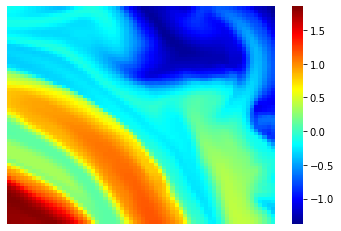

In [4]:
_, cm = ulmo_plotting.load_palette()
g = sns.heatmap(np.flipud(img), xticklabels = [], yticklabels = [], cmap=cm)


### Calculate along-scan spectrum using numpy

In [30]:
begin = time.time()
spectrum, freq, slope_small, intercept_small, slope_large, intercept_large = numpy_ffft.fast_fft( array=img, dim=0, d=2000.,  Detrend_Demean=True )
end = time.time()
print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 0.0027582645416259766


In [31]:
spectrum.shape

(32,)

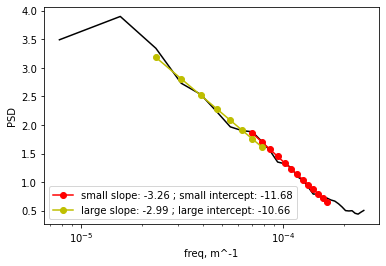

In [32]:
# plot the mean power spectrum
ax = plt.plot(freq, np.log10(spectrum),'k-')

small_range = [6000, 15000]
large_range = [12000, 50000]

ww_small = np.where( ( freq>(1/small_range[1])) & (freq<(1/small_range[0])))[0]
ww_large = np.where( ( freq>(1/large_range[1])) & (freq<(1/large_range[0])))[0]

ax = plt.plot(freq[ww_small] , slope_small*np.log10(freq[ww_small]) + intercept_small,'ro-', 
             label = 'small slope: {} ; small intercept: {}'.format(slope_small, intercept_small))

ax = plt.plot(freq[ww_large] , slope_large*np.log10(freq[ww_large]) + intercept_large,'yo-', 
             label = 'large slope: {} ; large intercept: {}'.format(slope_large, intercept_large))

plt.semilogx()
plt.xlabel('freq, m^-1')
plt.ylabel('PSD')

plt.legend()
plt.show()

In [39]:
fft.rfftfreq(64, 2000)


array([0.000000e+00, 7.812500e-06, 1.562500e-05, 2.343750e-05,
       3.125000e-05, 3.906250e-05, 4.687500e-05, 5.468750e-05,
       6.250000e-05, 7.031250e-05, 7.812500e-05, 8.593750e-05,
       9.375000e-05, 1.015625e-04, 1.093750e-04, 1.171875e-04,
       1.250000e-04, 1.328125e-04, 1.406250e-04, 1.484375e-04,
       1.562500e-04, 1.640625e-04, 1.718750e-04, 1.796875e-04,
       1.875000e-04, 1.953125e-04, 2.031250e-04, 2.109375e-04,
       2.187500e-04, 2.265625e-04, 2.343750e-04, 2.421875e-04,
       2.500000e-04])

### Calculate spectrum using mlab

In [40]:
begin = time.time()
spectrum1, freq1, slope_small1, intercept_small1, slope_large1, intercept_large1 = mlab_ffft.fast_fft( array=img, dim=0, d=2000.,  Detrend_Demean=True )
end = time.time()
print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 0.10128307342529297


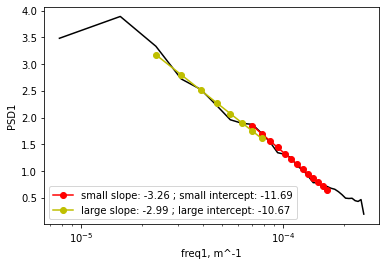

In [42]:
# plot the mean power spectrum
ax = plt.plot(freq1, np.log10(spectrum1),'k-')

small_range = [6000, 15000]
large_range = [12000, 50000]

ww_small1 = np.where( ( freq1>(1/small_range[1])) & (freq1<(1/small_range[0])))[0]
ww_large1 = np.where( ( freq1>(1/large_range[1])) & (freq1<(1/large_range[0])))[0]

ax = plt.plot(freq1[ww_small1] , slope_small1*np.log10(freq1[ww_small]) + intercept_small1,'ro-', 
             label = 'small slope: {} ; small intercept: {}'.format(slope_small1, intercept_small1))

ax = plt.plot(freq1[ww_large1] , slope_large1*np.log10(freq1[ww_large1]) + intercept_large1,'yo-', 
             label = 'large slope: {} ; large intercept: {}'.format(slope_large1, intercept_large1))


plt.semilogx()
plt.xlabel('freq1, m^-1')
plt.ylabel('PSD1')

plt.legend()
plt.show()

#### Do same thing for image with noise

In [45]:
with h5py.File('/home/jovyan/LLC_modis2012_SST_noise_demean_preproc.h5', 'r') as f:
    img_sst = f['valid'][0, 0, ...]

In [46]:
img_sst

array([[ 1.6382016 ,  1.414248  ,  1.7501845 , ..., -0.07246878,
        -0.01901747, -0.11494689],
       [ 1.515734  ,  2.0590363 ,  1.6309777 , ...,  0.1918992 ,
         0.12954123, -0.45047212],
       [ 1.7076521 ,  1.6286865 ,  1.6085199 , ..., -0.0254315 ,
        -0.11192779, -0.25023606],
       ...,
       [-0.15340394, -0.22986653, -0.46267843, ..., -1.5343685 ,
        -1.0262175 , -1.4545958 ],
       [-0.33064893, -0.19280079, -0.42787224, ..., -1.0248392 ,
        -1.139636  , -1.4790385 ],
       [-0.1260656 , -0.06111499,  0.05413185, ..., -1.2422833 ,
        -1.1746068 , -1.1786939 ]], dtype=float32)

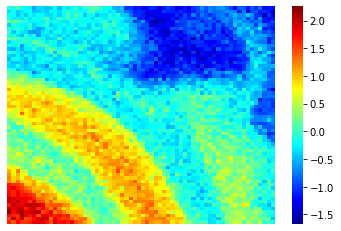

In [47]:
g = sns.heatmap(np.flipud(img_sst), xticklabels = [], yticklabels = [], cmap=cm)

### numpy way

In [48]:
begin = time.time()
spectrum, freq, slope_small, intercept_small, slope_large, intercept_large = numpy_ffft.fast_fft( array=img_sst, dim=0, d=2000.,  Detrend_Demean=True )
end = time.time()
print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 0.0019230842590332031


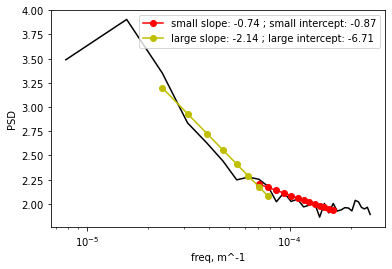

In [49]:
# plot the mean power spectrum
ax = plt.plot(freq, np.log10(spectrum),'k-')

small_range = [6000, 15000]
large_range = [12000, 50000]

ww_small = np.where( ( freq>(1/small_range[1])) & (freq<(1/small_range[0])))[0]
ww_large = np.where( ( freq>(1/large_range[1])) & (freq<(1/large_range[0])))[0]

ax = plt.plot(freq[ww_small] , slope_small*np.log10(freq[ww_small]) + intercept_small,'ro-', 
             label = 'small slope: {} ; small intercept: {}'.format(slope_small, intercept_small))

ax = plt.plot(freq[ww_large] , slope_large*np.log10(freq[ww_large]) + intercept_large,'yo-', 
             label = 'large slope: {} ; large intercept: {}'.format(slope_large, intercept_large))

plt.semilogx()
plt.xlabel('freq, m^-1')
plt.ylabel('PSD')

plt.legend()
plt.show()

### mlab way

In [51]:
begin = time.time()
spectrum1, freq1, slope_small1, intercept_small1, slope_large1, intercept_large1 = mlab_ffft.fast_fft( array=img_sst, dim=0, d=2000.,  Detrend_Demean=True )
end = time.time()
print(f"Total runtime of the program is {end - begin}")

Total runtime of the program is 0.022940635681152344


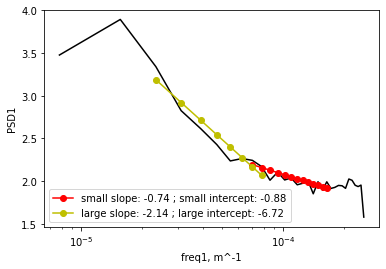

In [52]:
# plot the mean power spectrum
ax = plt.plot(freq1, np.log10(spectrum1),'k-')

small_range = [6000, 15000]
large_range = [12000, 50000]

ww_small1 = np.where( ( freq1>(1/small_range[1])) & (freq1<(1/small_range[0])))[0]
ww_large1 = np.where( ( freq1>(1/large_range[1])) & (freq1<(1/large_range[0])))[0]

ax = plt.plot(freq1[ww_small1] , slope_small1*np.log10(freq1[ww_small]) + intercept_small1,'ro-', 
             label = 'small slope: {} ; small intercept: {}'.format(slope_small1, intercept_small1))

ax = plt.plot(freq1[ww_large1] , slope_large1*np.log10(freq1[ww_large1]) + intercept_large1,'yo-', 
             label = 'large slope: {} ; large intercept: {}'.format(slope_large1, intercept_large1))


plt.semilogx()
plt.xlabel('freq1, m^-1')
plt.ylabel('PSD1')

plt.legend()
plt.show()